# Subject Characteristics

The purpose of this notebook is to explore and clean the subject characteristics data available in ADNI.The data in these files covers a broad range of patient information including but not limited to patient education, sex, and family history.

**Import libraries**

In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# import custom dependencies
import sys
from ADNI_utilities import define_terms, describe_meta_data, paths_with_ext, append_meta_cols

In [107]:
# define figure defaults
mpl.rc('axes', labelsize=10, titlesize=14)
mpl.rc('figure', figsize=[6,4], titlesize=14)
mpl.rc('legend', fontsize=12)
mpl.rc('lines', linewidth=2, color='k')
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)

## Data meta analysis

There are multiple files to consider. Before looking in depth at specific data, it may be helpful to inspect some summary information on each data set. To start we can profile the following for each file:

- number of records
- number of patients
- number of duplicate entries per patient
- ADNI phases covered

In [108]:
# import adni dictionary
adni_dict_df = pd.read_csv("../data/study info/DATADIC.csv")

In [109]:
# print meta data for each file
csv_paths = paths_with_ext(directory="../data/Subject_Characteristics/")
for path in csv_paths:
    print("\n" + path + "\n")
    df = pd.read_csv(path, low_memory=False)
    describe_meta_data(df)


../data/Subject_Characteristics/FAMXHPAR.csv

Phases:	 ['ADNI3']
Num Entries: 587
Num Columns: 19
Num Patients: 587
Records per Patient: 1-1
Phases spanned per patient: 1-1
Patients w/ Duplicates: 0

../data/Subject_Characteristics/FAMXHSIB.csv

Phases:	 ['ADNI3']
Num Entries: 540
Num Columns: 17
Num Patients: 540
Records per Patient: 1-1
Phases spanned per patient: 1-1
Patients w/ Duplicates: 0

../data/Subject_Characteristics/FHQ.csv

No phases listed
Num Entries: 2952
Num Columns: 15
Num Patients: 2677
Records per Patient: 1-3
Phases spanned per patient: 0-0
Patients w/ Duplicates: 2677

../data/Subject_Characteristics/PTDEMOG.csv

Phases:	 ['ADNI1' 'ADNIGO' 'ADNI2' 'ADNI3']
Num Entries: 4357
Num Columns: 32
Num Patients: 3582
Records per Patient: 1-6
Phases spanned per patient: 1-3
Patients w/ Duplicates: 163


It looks like there is some information on family history which is split into a few different .files. ADNI1-ADNI2 are covered under `FHQ.csv` and ADNI3 family history is split into `FAMXHPAR` and `FAMXHSIB`. We'll start with patient demographics since that seems to cover all patients and ADNI phases.

## Patient Demographics

The patient demographics data set covers general information about the patients such has:

- Gender
- Date of birth
- Marital Status
- Handedness
- Primary language

Most of these features should fall under the category of predictors that we have no prior expectation will be linked to Alzheimer's.

In [110]:
# intialize neuroexam results and describe entries
demo_df = pd.read_csv("../data/Subject_Characteristics/PTDEMOG.csv")

# create dictionary_df for NEUROEXM table
demo_dict = define_terms(demo_df, adni_dict_df, table_name="PTDEMOG");
demo_dict

,FLDNAME,TYPE,TBLNAME,TEXT,CODE
0,NaN,NaN,NaN,NaN,NaN
1,ID,N,PTDEMOG,Record ID,"""crfname"",""Participant Demographic Information..."
2,RID,N,PTDEMOG,Participant roster ID,NaN
3,SITEID,N,PTDEMOG,Site ID,NaN
4,VISCODE,T,PTDEMOG,Visit code,NaN
5,VISCODE2,T,PTDEMOG,Translated visit code,NaN
6,USERDATE,S,PTDEMOG,Date record created,NaN
7,USERDATE2,S,PTDEMOG,Date record last updated,NaN
8,PTSOURCE,N,PTDEMOG,Information Source,1=Participant Visit;2=Telephone Call
9,PTGENDER,N,PTDEMOG,1. Participant Gender,1=Male; 2=Female


Many of the columns above are not likely to be useful because they are dependent on answers in other columns. Some of the columns are likely to be intractable (eg. `Primary Occupation`). We can invesigate the values of some of these further.

In [111]:
# define columns to inspect unique values
cols = ["PTWORK","PTHOME","PTEDUCAT","PTMARRY","PTMCIBEG"]
[print("{0}:\n{1}\n".format(col,demo_df[col].unique())) for col in cols];


PTWORK:
['computer progammer' '-4' 'chemical engineer' ... 'analyst network'
 'Cardiac cath lab tech' 'manager (technical)']

PTHOME:
[ 1.  3.  2.  6.  8.  5.  4. -4.  7. nan]

PTEDUCAT:
[16. 18. 10. 13. 12.  9. 14. 20. 17.  3. 19. 15.  8. 11.  4.  7.  6. -1.
 -4. nan  5.]

PTMARRY:
[ 1.  2.  3.  4.  5. -4. nan]

PTMCIBEG:
[  nan 2006. 2005. 2009. 2008. 2007. 1997. 2000. 1996. 1999. 1985. 2010.
 1993. 2004. 1998. 2002. 1994. 2001. 2003. 1995. 1986. 1991. 1990.]



We can see from the summary above that `-1`, `-4`, and `NaN` are all used for missing values. We can also see that `PTWORK` has too many unique values to print, meaning that our feature space will explode if we include this category. `PTEDUCAT` is most likely a continuous feature either containing the total number of years of education or some kind of summary index. We can look at the histogram to see if it matches our expectation for number of years (ie. heavily weighted to 10+ with very few values below).

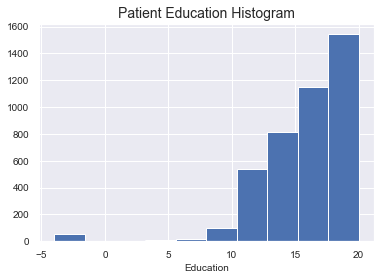

In [112]:
# PTEDUCAT histogram
plt.hist(demo_df.PTEDUCAT.dropna())
plt.xlabel("Education")
plt.title("Patient Education Histogram");

This distribution seems to match our expectation for a distribution of number of years of education. Now we can define our columns of interest.

In [113]:
# define columns to keep
demo_cols  = demo_df.columns[[9,11,12,13,14,18,22,29,30]]
demo_cols

Index(['PTGENDER', 'PTDOBYY', 'PTHAND', 'PTMARRY', 'PTEDUCAT', 'PTNOTRT',
       'PTTLANG', 'PTETHCAT', 'PTRACCAT'],
      dtype='object')

Next we should inspect the data types and make sure the format of each column makes sense.

In [114]:
# print data types for each col
demo_df[demo_cols].dtypes

PTGENDER    float64
PTDOBYY     float64
PTHAND      float64
PTMARRY     float64
PTEDUCAT    float64
PTNOTRT     float64
PTTLANG     float64
PTETHCAT    float64
PTRACCAT    float64
dtype: object

All of our columns are stored as floats, but most of them contain categorical variables and will need to be converted to int.

In [115]:
# replace missing values with -1
demo_df.replace({np.nan:-1, -4:-1}, inplace=True)

# convert categorical columns to int
categoricals = demo_cols[[0,2,3,5,6,7,8]]
demo_df[categoricals] = demo_df[categoricals].astype(int)
demo_df[demo_cols].dtypes

PTGENDER      int32
PTDOBYY     float64
PTHAND        int32
PTMARRY       int32
PTEDUCAT    float64
PTNOTRT       int32
PTTLANG       int32
PTETHCAT      int32
PTRACCAT      int32
dtype: object

## Patient Family History

These files contain information about history of dementia in the patient's family. With the patient family history information spread across multiple files, it will be important to determine if the questions asked are consistent enough across phases to combine into a single family history table.

In [116]:
# intialize family history results and describe entries
fhq_df = pd.read_csv("../data/Subject_Characteristics/FHQ.csv")

# create dictionary_df for NEUROEXM table
fhq_dict = define_terms(fhq_df, adni_dict_df, table_name="FHQ");
fhq_dict

,FLDNAME,TYPE,TBLNAME,TEXT,CODE
0,NaN,NaN,NaN,NaN,NaN
1,ID,N,FHQ,Record ID,"""crfname"",""Family History Questionnaire"",""inde..."
2,RID,N,FHQ,Participant roster ID,NaN
3,SITEID,N,FHQ,Site ID,NaN
4,VISCODE,T,FHQ,Visit code,NaN
5,USERDATE,S,FHQ,Date record created,NaN
6,USERDATE2,S,FHQ,Date record last updated,NaN
7,FHQSOURCE,N,FHQ,Information Souce,1=Participant Visit;2=Telephone Call
8,FHQPROV,N,FHQ,Indicate below who provided the information co...,1=Participant only; 2=Study Partner only; 3=Bo...
9,FHQMOM,N,FHQ,Dementia,1=Yes; 0=No


The family history questionnaire used in ADNI1, ADNIGO, and ADNI2 contains only information about the prevalence of dementia and alzheimer's disease in parents. The only information collected about siblings is whether or not the participant has siblings, meaning that most participants will not have medical history information regarding their siblings. For that reason, we will focus on the parent questionnaire only from ADNI3.

In [117]:
# intialize family history results and describe entries
parent_df = pd.read_csv("../data/Subject_Characteristics/FAMXHPAR.csv")

# create dictionary_df for NEUROEXM table
parent_dict = define_terms(parent_df, adni_dict_df, table_name="FAMHXPAR");
parent_dict

,FLDNAME,TYPE,TBLNAME,TEXT,CODE
0,NaN,NaN,NaN,NaN,NaN
1,ID,N,FAMHXPAR,NaN,NaN
2,RID,N,FAMHXPAR,NaN,NaN
3,SITEID,N,FAMHXPAR,NaN,NaN
4,VISCODE,T,FAMHXPAR,NaN,NaN
5,USERDATE,S,FAMHXPAR,NaN,NaN
6,USERDATE2,S,FAMHXPAR,NaN,NaN
7,MOTHALIVE,N,FAMHXPAR,Is mother living?,0=No;1=Yes
8,MOTHAGE,N,FAMHXPAR,Current age or age at death?,NaN
9,MOTHDEM,N,FAMHXPAR,Did/Does the biological mother have dementia?,0=No;1=Yes


The table above shows that information about the presence of dementia and alzheimer's is contained in both data sets. We will merge these measures along with patient `RID` into a single table.

In [118]:
# concatenate data from both dataframes along rows
rid = np.hstack((fhq_df.RID.values,parent_df.RID.values))
viscode = np.hstack((fhq_df.VISCODE.values,parent_df.VISCODE.values))
momdem = np.hstack((fhq_df.FHQMOM.values,parent_df.MOTHDEM.values))
momad = np.hstack((fhq_df.FHQMOMAD.values,parent_df.MOTHAD.values))
daddem = np.hstack((fhq_df.FHQDAD.values,parent_df.FATHDEM.values))
dadad = np.hstack((fhq_df.FHQDADAD.values,parent_df.FATHAD.values))

# concatenate features along columns
fam_data = np.vstack((rid,viscode,momdem,momad,daddem,dadad)).T

# define a new dataframe
fam_df = pd.DataFrame(columns=["RID","VISCODE","MOMDEM","MOMAD","DADDEM","DADAD"], data=fam_data)

In [119]:
# inspect header
fam_df.head()

,RID,VISCODE,MOMDEM,MOMAD,DADDEM,DADAD
0,2,sc,0,0,0,0
1,1,f,0,-4,0,-4
2,3,sc,0,0,1,1
3,4,sc,0,0,0,0
4,5,sc,0,0,1,0


We can see that all the values above are stored as floats. Now we need to ensure that all data types are compatible with categorical data.

In [120]:
# replace missing values with -1
fam_df.replace({np.nan:-1, -4:-1}, inplace=True)
int_cols = ["RID","MOMDEM","MOMAD","DADDEM","DADAD"]
fam_df[int_cols] = fam_df[int_cols].astype(int)

# record columns to keep
fam_cols = fam_df.columns

## Save cleaned subject characteristics to file

With the columns from each data set hand-picked, the appropriate data types selected, and the missingness standardized, we can write the new cleaned dataframes to file.

In [121]:
# intialize dataframe list and empty placeholder
all_dfs = [demo_df, fam_df]
all_df_cols = [demo_cols, fam_cols]
df_names = ["demographics","famhist"]

# iterate over dataframes
for i,df in enumerate(all_dfs):
    
    # ensure RID is in column list for indexing
    cols = all_df_cols[i]
    cols = append_meta_cols(df.columns, cols)

    # write data to csv
    to_write = df[cols]
    to_write.to_csv("../data/Cleaned/" + df_names[i] + "_clean.csv")